In [4]:
# Generating a sample credit card dataset and saving to Excel
import pandas as pd
import numpy as np

# Generate synthetic data with 20 features, 1000 normal and 50 anomalous samples
np.random.seed(42)
n_features = 20
n_normal = 1000
n_anomalous = 50

# Normal transactions: Random values centered around 0 with small deviations
normal_data = np.random.normal(loc=0, scale=1, size=(n_normal, n_features))

# Anomalous transactions: Random values with larger deviations
anomalous_data = np.random.normal(loc=0, scale=5, size=(n_anomalous, n_features))

# Create DataFrame and label columns
normal_df = pd.DataFrame(normal_data, columns=[f'feature_{i+1}' for i in range(n_features)])
anomalous_df = pd.DataFrame(anomalous_data, columns=[f'feature_{i+1}' for i in range(n_features)])

# Add 'Class' column (0 for normal, 1 for anomaly)
normal_df['Class'] = 0
anomalous_df['Class'] = 1

# Concatenate the normal and anomalous data
data = pd.concat([normal_df, anomalous_df], ignore_index=True)

# Save the dataset to an Excel file
data.to_excel('sample_creditcard_data.xlsx', index=False)
print("Sample dataset saved as 'sample_creditcard_data.xlsx'")


Sample dataset saved as 'sample_creditcard_data.xlsx'


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('sample_creditcard_data.xlsx')

In [9]:
X = data.drop(columns=['Class'])
y = data['Class']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
input_dim = X_train.shape[1]
encoding_dim = 16

In [14]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)

In [15]:
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [16]:
autoencoder = Model(inputs=input_layer, outputs=decoded)

In [17]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [18]:
X_train_normal = X_train[y_train == 0]
history = autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.0335 - loss: 0.6986 - val_accuracy: 0.0741 - val_loss: 0.7105
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0347 - loss: 0.6983 - val_accuracy: 0.0741 - val_loss: 0.7072
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0325 - loss: 0.6967 - val_accuracy: 0.0741 - val_loss: 0.7038
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0379 - loss: 0.6911 - val_accuracy: 0.0617 - val_loss: 0.7004
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0384 - loss: 0.6930 - val_accuracy: 0.0494 - val_loss: 0.6968
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0421 - loss: 0.6906 - val_accuracy: 0.0370 - val_loss: 0.6931
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0373 - loss: 0.6853 - val_accuracy: 0.0247 - val_loss: 0.6893
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0476 - loss: 0.6799 - val_accuracy: 0.0370 - val_loss: 0.6853

In [19]:
reconstructed_X = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed_X, 2), axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [20]:
threshold = np.percentile(mse, 95)

In [21]:
anomalies = mse > threshold

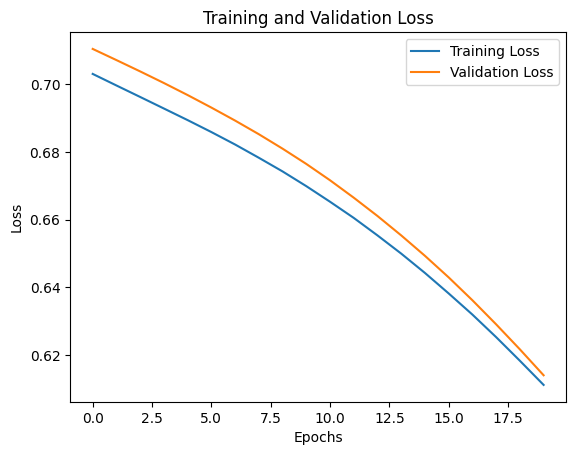

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [23]:
print(f"Reconstruction error threshold: {threshold}")
print(f"Examples of Anomalies: \n{np.where(anomalies == True)}")

Reconstruction error threshold: 8.553552055562475
Examples of Anomalies: 
(array([ 15,  48,  78, 106, 119, 132, 172, 177, 183, 193, 201], dtype=int64),)
